#Part 2 of the tensorflow tutorial notes
# Setup 

lets again start with the imports, device, and distribution strategy on TPU. If you did not understand any of the above lines then look at part 1 again.

Also I forgot to write it out previously but take a look at https://www.tensorflow.org/tutorials

In [22]:
%tensorflow_version 2.x
import tensorflow as tf
import os

In [23]:
## Set device
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

# set device as tpu 
tf.device('/TPU:0')

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.88.187.18:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.88.187.18:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [24]:
# distrubtion stratgey
tfd = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Tensorflow Core Learning Algos

- linear regression
- classification
- clustering
- HMM -> Hidden Markov Models

these are the fundamental algos that can be expanded on.

## Linear Regression

The most basic form of machine learning and is used to predict numeric values.

https://www.tensorflow.org/tutorials/estimator/linear

as a summary linear regression which is a basic form of ml where you linear corespondance between datapoints.

below I have draw a graph

(0.0, 10.0, 0.0, 20.0)

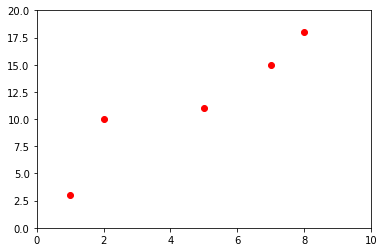

In [25]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 5, 7, 8]
y = [3, 10, 11, 15, 18]
plt.plot(x, y, 'ro')
plt.axis([0, 10, 0, 20]) # 0 to 10 x axis and 0 to 20 y axis

as you can see there is already a linear corespondance and you can draw a line through it to predict y points for x values with a straight line

the formula would be y = mx + b and here below is an example of the line of best fit for the above graph

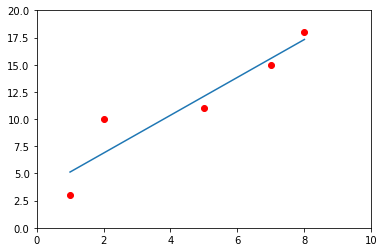

In [26]:
plt.plot(x, y, 'ro')
plt.axis([0, 10, 0, 20])

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

The blue line can be used in the future to predict more values

### Linear Regression Project

This is a simple project to use linear regression.

In [27]:
!pip install -q sklearn

In [28]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

Lets load the data set from a a few files for ***The Titanic*** and who is going to die or surrive.

In [29]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

In [30]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [31]:
dfeval.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [32]:
y_train = dftrain.pop('survived') # removed and stored survided in ytain 
y_eval = dfeval.pop('survived') # removed and stroed survived in yeval

In [33]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [34]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


lets describe all the data after viewing them

In [35]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [36]:
dftrain.shape

(627, 9)

as we can see we have 627 stuff / entries and 9 features

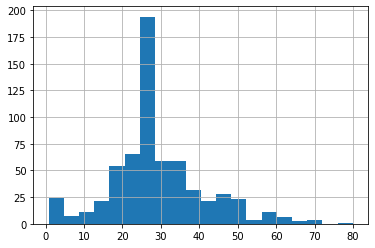

In [37]:
dftrain.age.hist(bins=20)

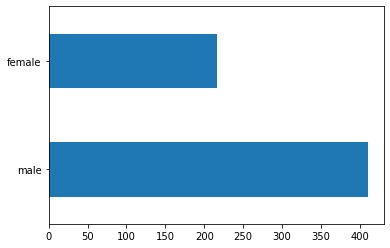

In [38]:
dftrain.sex.value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

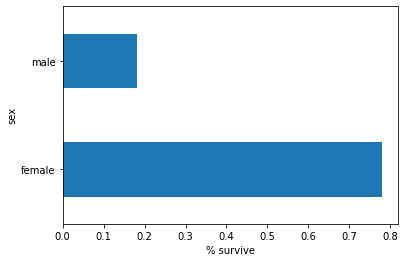

In [39]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [43]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

#### Training process

epochs baasically spliting up the data and batches to allow the model to train on. 

In [59]:
def make_input_fn(data_df, label_df, num_epochs=200, shuffle=True, batch_size=128):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [60]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpfq71lsu6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpfq71lsu6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [62]:
with tfd.scope():
  linear_est.train(train_input_fn)
  result = linear_est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.
/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpfq71lsu6/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /tmp/tmpfq71lsu6/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 1000...


INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpfq71lsu6/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpfq71lsu6/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 1000...


INFO:tensorflow:loss = 0.4159714, step = 1000


INFO:tensorflow:loss = 0.4159714, step = 1000


INFO:tensorflow:global_step/sec: 189.759


INFO:tensorflow:global_step/sec: 189.759


INFO:tensorflow:loss = 0.40743643, step = 1100 (0.533 sec)


INFO:tensorflow:loss = 0.40743643, step = 1100 (0.533 sec)


INFO:tensorflow:global_step/sec: 350.488


INFO:tensorflow:global_step/sec: 350.488


INFO:tensorflow:loss = 0.41691747, step = 1200 (0.286 sec)


INFO:tensorflow:loss = 0.41691747, step = 1200 (0.286 sec)


INFO:tensorflow:global_step/sec: 346.506


INFO:tensorflow:global_step/sec: 346.506


INFO:tensorflow:loss = 0.3407691, step = 1300 (0.293 sec)


INFO:tensorflow:loss = 0.3407691, step = 1300 (0.293 sec)


INFO:tensorflow:global_step/sec: 354.597


INFO:tensorflow:global_step/sec: 354.597


INFO:tensorflow:loss = 0.4439152, step = 1400 (0.280 sec)


INFO:tensorflow:loss = 0.4439152, step = 1400 (0.280 sec)


INFO:tensorflow:global_step/sec: 343.593


INFO:tensorflow:global_step/sec: 343.593


INFO:tensorflow:loss = 0.34055862, step = 1500 (0.291 sec)


INFO:tensorflow:loss = 0.34055862, step = 1500 (0.291 sec)


INFO:tensorflow:global_step/sec: 348.742


INFO:tensorflow:global_step/sec: 348.742


INFO:tensorflow:loss = 0.41729707, step = 1600 (0.287 sec)


INFO:tensorflow:loss = 0.41729707, step = 1600 (0.287 sec)


INFO:tensorflow:global_step/sec: 373.18


INFO:tensorflow:global_step/sec: 373.18


INFO:tensorflow:loss = 0.38820428, step = 1700 (0.270 sec)


INFO:tensorflow:loss = 0.38820428, step = 1700 (0.270 sec)


INFO:tensorflow:global_step/sec: 354.174


INFO:tensorflow:global_step/sec: 354.174


INFO:tensorflow:loss = 0.331551, step = 1800 (0.280 sec)


INFO:tensorflow:loss = 0.331551, step = 1800 (0.280 sec)


INFO:tensorflow:global_step/sec: 363.204


INFO:tensorflow:global_step/sec: 363.204


INFO:tensorflow:loss = 0.44257936, step = 1900 (0.273 sec)


INFO:tensorflow:loss = 0.44257936, step = 1900 (0.273 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2000...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2000...


INFO:tensorflow:Saving checkpoints for 2000 into /tmp/tmpfq71lsu6/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2000 into /tmp/tmpfq71lsu6/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2000...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 2000...


INFO:tensorflow:Loss for final step: 0.44540542.


INFO:tensorflow:Loss for final step: 0.44540542.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2022-07-17T20:16:51


INFO:tensorflow:Starting evaluation at 2022-07-17T20:16:51


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpfq71lsu6/model.ckpt-2000


INFO:tensorflow:Restoring parameters from /tmp/tmpfq71lsu6/model.ckpt-2000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 0.87971s


INFO:tensorflow:Inference Time : 0.87971s


INFO:tensorflow:Finished evaluation at 2022-07-17-20:16:52


INFO:tensorflow:Finished evaluation at 2022-07-17-20:16:52


INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.77272725, accuracy_baseline = 0.625, auc = 0.8375268, auc_precision_recall = 0.78552926, average_loss = 0.47736508, global_step = 2000, label/mean = 0.375, loss = 0.41326085, precision = 0.6788991, prediction/mean = 0.41973737, recall = 0.74747473


INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.77272725, accuracy_baseline = 0.625, auc = 0.8375268, auc_precision_recall = 0.78552926, average_loss = 0.47736508, global_step = 2000, label/mean = 0.375, loss = 0.41326085, precision = 0.6788991, prediction/mean = 0.41973737, recall = 0.74747473


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: /tmp/tmpfq71lsu6/model.ckpt-2000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: /tmp/tmpfq71lsu6/model.ckpt-2000


In [63]:
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.77272725


In [64]:
print(result)

{'accuracy': 0.77272725, 'accuracy_baseline': 0.625, 'auc': 0.8375268, 'auc_precision_recall': 0.78552926, 'average_loss': 0.47736508, 'label/mean': 0.375, 'loss': 0.41326085, 'precision': 0.6788991, 'prediction/mean': 0.41973737, 'recall': 0.74747473, 'global_step': 2000}


In [66]:
# not great at predicting one output but larger batches of data
# lets make preddiction for every single point of dataset
with tfd.scope():
  result = list(linear_est.predict(eval_input_fn))
print(result)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.
/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmpfq71lsu6/model.ckpt-2000


INFO:tensorflow:Restoring parameters from /tmp/tmpfq71lsu6/model.ckpt-2000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[{'logits': array([-2.5087237], dtype=float32), 'logistic': array([0.07524884], dtype=float32), 'probabilities': array([0.9247511 , 0.07524887], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.3352805], dtype=float32), 'logistic': array([0.58304363], dtype=float32), 'probabilities': array([0.41695634, 0.58304363], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([1.277217], dtype=float32), 'logistic': array([0.7819756], dtype=float32), 'probabilities': array([0.21802431, 0.7819757 ], dtype=float32), 'class_ids': array([1]), 'classes': array([b'1'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([0.5630008], dtype=floa

In [75]:
print(result[0]) #prediction for one

def person_stat_death(n):
  print("----------")
  print("Estimated: ")
  print("------")
  print(dfeval.loc[n])
  print(result[n]['probabilities'][1])
  print("-------")
  print("Actual: ")
  print("-------")
  print(y_eval.loc[n])
  print("----------")

person_stat_death(2)
person_stat_death(3)
person_stat_death(4)

{'logits': array([-2.5087237], dtype=float32), 'logistic': array([0.07524884], dtype=float32), 'probabilities': array([0.9247511 , 0.07524887], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}
----------
Estimated: 
------
sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
0.7819757
-------
Actual: 
-------
1
----------
----------
Estimated: 
------
sex                        female
age                          55.0
n_siblings_spouses              0
parch                           0
fare                         16.0
class                      Second
deck                      unknown
embar

## Classification 